# Introdução

Atividade produzida para a disciplina EBM116 – Tópicos Avançados em Imagens Médicas do programa de pós-graduação em Engenharia Biomédica da Universidade Federal do ABC (UFABC). O objetivo da atividade foi explorar técnicas de detecção e visualização do movimento em imagens.

Autor: Leonardo Alves Ferreira

# Sumário

1. [Detecção do movimento](#ex1) <br>
2. [Visualização do movimento](#ex2) <br>

# Detecção do movimento <a name="ex1"></a>

O dataset utilizado para a realização desta atividade foi fornecido pela <a src="https://vision.middlebury.edu/flow/data/">Middlebury</a>, tendo sido escolhido um conjunto de duas imagens em preto e branco, apresentadas a seguir:

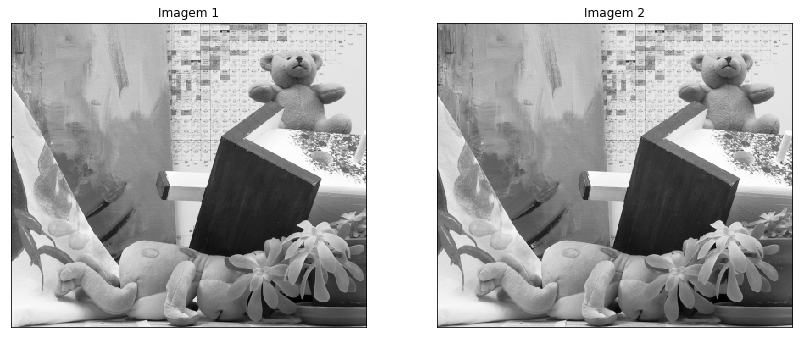

In [44]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

im1=imageio.imread('Teddy/frame10.png')
im2=imageio.imread('Teddy/frame11.png')

plt.figure(figsize=(14,8))

plt.subplot(121),plt.imshow(im1, cmap = 'Greys_r')
plt.title('Imagem 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im2, cmap = 'Greys_r')
plt.title('Imagem 2'), plt.xticks([]), plt.yticks([])

plt.show()

Para detectar o movimento entre essas imagens, utilizaremos uma função da biblioteca cv2 que considera a imagem toda para calcular o campo de velocidades. 

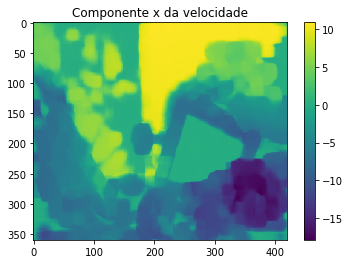

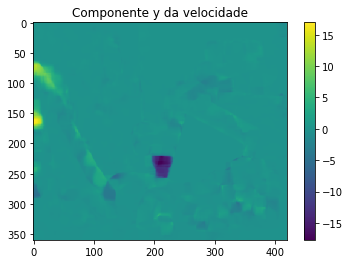

In [9]:
import cv2

# Calcular o fluxo óptico
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 3, 15, 3, 5, 0, 0)

# Selecionar as velocidades em x e em y
u = flow[:,:,0] # velocidades em x
v = flow[:,:,1] # velocidades em y

# Visualização da magnitude das velocidades ao longo do espaço
plt.imshow(u)
plt.title('Componente x da velocidade')
plt.colorbar()
plt.show()

plt.imshow(v)
plt.title('Componente y da velocidade')
plt.colorbar()
plt.show()

Como pode ser visto, foi detectado principalmente um movimento ao longo do eixo X na imagem, sendo um movimento majoritariamente positivo na parte superior e negativo na parte inferior.

# Visualização do movimento <a name="ex2"></a>

Uma maneira mais intuitiva de visualizar o resultado do fluxo óptico calculado é plotando os vetores de velocidade em cima da imagem original. Para isso, a função quiver da biblioteca Matplotlib pode ser utilizada.

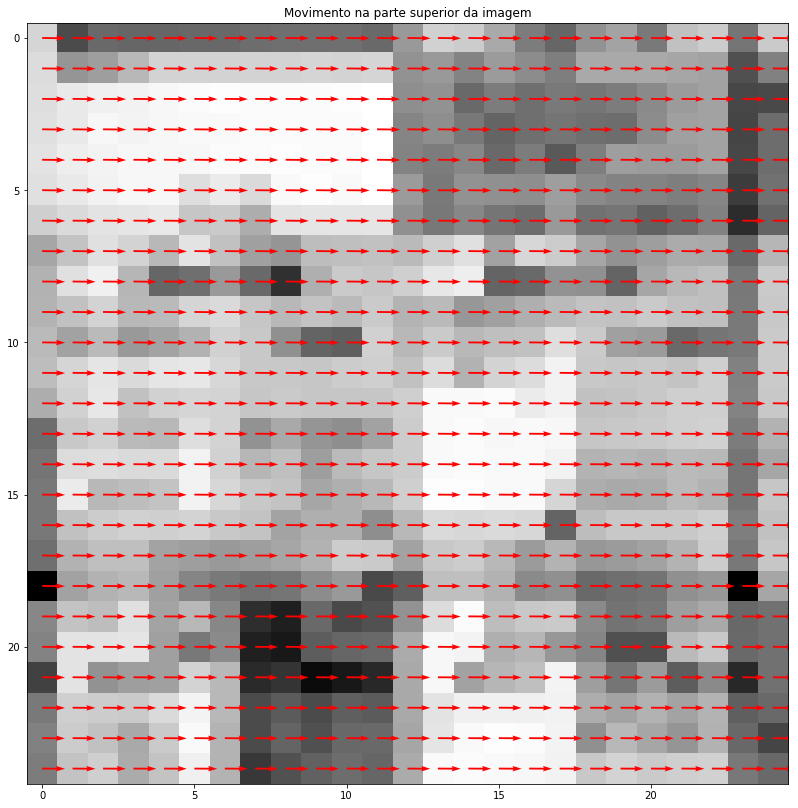

In [49]:
# Criar um array com as coordenadas espaciais para as velocidades
x = np.arange(0,u.shape[0]) # coordenadas espaciais x
y = np.arange(0,u.shape[1]) # coordenadas espaciais y

# Plotar os vetores de velocidade
fig = plt.figure(figsize=(14,14))
plt.imshow(im1[50:75,200:225],cmap='gray')
# Velocidades em y invertidas pois o matplotlib inverte o eixo y para plotar imagens
plt.quiver(y[0:25],x[0:25],u[50:75,200:225],-v[50:75,200:225],scale=14.0,units='xy',color='red')
plt.title("Movimento na parte superior da imagem")
plt.show()

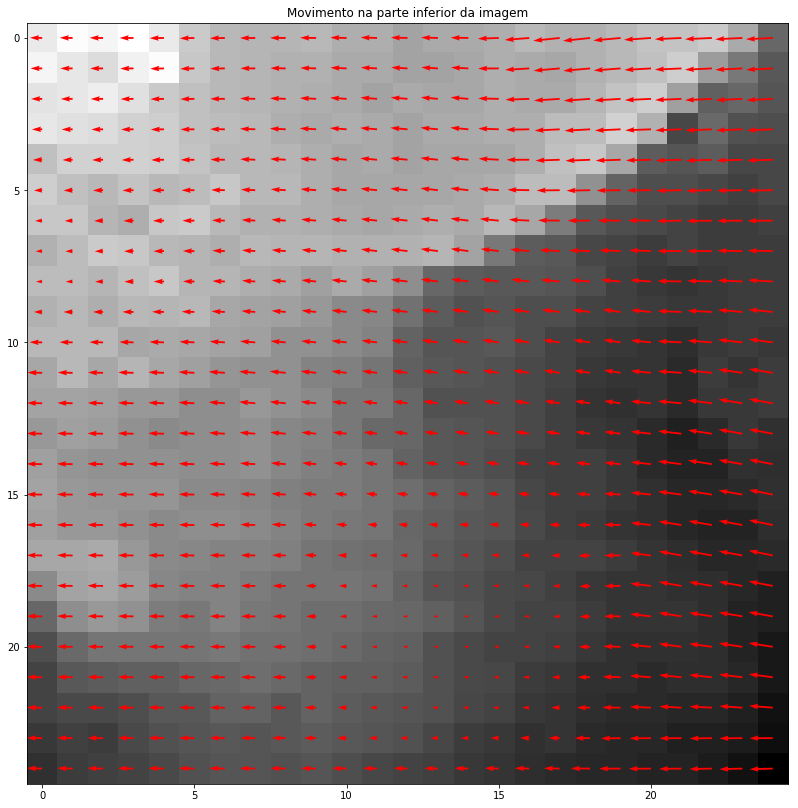

In [50]:
fig = plt.figure(figsize=(14,14))
plt.imshow(im1[320:345,250:275],cmap='gray')
plt.quiver(y[0:25],x[0:25],u[320:345,250:275],-v[320:345,250:275],scale=14.0,units='xy',color='red')
plt.title("Movimento na parte inferior da imagem")
plt.show()

Como pode ser visto, o resultado foi como esperado, com setas apontando para a direita (positivo em x) na região superior e para a esquerda (negativo em x) na inferior. 